In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (20, 5)


현황분석 시계열 그래프로 분석

In [3]:
df = pd.read_csv("C:/Users/Administrator/Desktop/coding/python/muticam/jupyter note/data/AB테스트/일별현황데이터.csv", engine = "python", encoding="euc-kr")

df


,구매자수,방문자수,일자,총 판매 금액
0,328,1498,2019-01-01,6454056
1,301,1514,2019-01-02,5941439
2,219,1409,2019-01-03,3967404
3,276,1617,2019-01-04,5073708
4,311,1482,2019-01-05,6482795
...,...,...,...,...
360,253,1515,2019-12-27,5337541
361,276,1519,2019-12-28,5326248
362,313,1414,2019-12-29,6392399
363,266,1556,2019-12-30,5401130


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구매자수     365 non-null    int64 
 1   방문자수     365 non-null    int64 
 2   일자       365 non-null    object
 3   총 판매 금액  365 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.5+ KB


In [5]:
df.describe()

,구매자수,방문자수,총 판매 금액
count,365.000000,365.000000,3.650000e+02
mean,298.347945,1502.024658,5.983674e+06
std,54.205014,52.454239,1.129601e+06
min,108.000000,1370.000000,2.002536e+06
25%,262.000000,1466.000000,5.222217e+06
50%,297.000000,1500.000000,5.990007e+06
75%,337.000000,1537.000000,6.734271e+06
max,444.000000,1638.000000,9.318244e+06


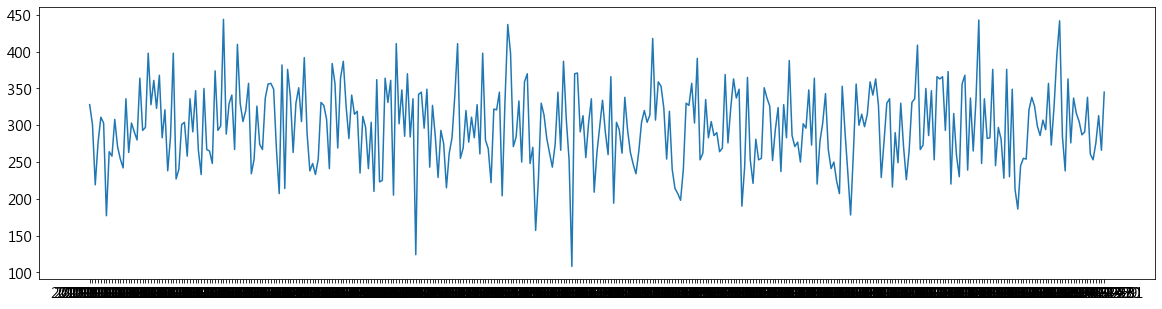

In [6]:
# 날자별 구매자 수

plt.plot(df["일자"],df["구매자수"])


In [7]:
# 날자별 구매자 수--매월 1일을 마킹하기 위해서 어찌해야할까???
# 매월 월별일수 누적합산...
xtic_range=np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) 
xtic_range


#일자 확인용 #iloc[행,열]
df.iloc[0,2] 
df.iloc[31,2]
df.iloc[273,2]

array([  0,  31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334],
      dtype=int32)

'2019-01-01'

'2019-02-01'

'2019-10-01'

([<matplotlib.axis.XTick at 0xac1a0a0>,
 [Text(0, 0, '2019-01-01'),
  Text(31, 0, '2019-02-01'),
  Text(59, 0, '2019-03-01'),
  Text(90, 0, '2019-04-01'),
  Text(120, 0, '2019-05-01'),
  Text(151, 0, '2019-06-01'),
  Text(181, 0, '2019-07-01'),
  Text(212, 0, '2019-08-01'),
  Text(243, 0, '2019-09-01'),
  Text(273, 0, '2019-10-01'),
  Text(304, 0, '2019-11-01'),
  Text(334, 0, '2019-12-01')])

0      2019-01-01
31     2019-02-01
59     2019-03-01
90     2019-04-01
120    2019-05-01
151    2019-06-01
181    2019-07-01
212    2019-08-01
243    2019-09-01
273    2019-10-01
304    2019-11-01
334    2019-12-01
Name: 일자, dtype: object

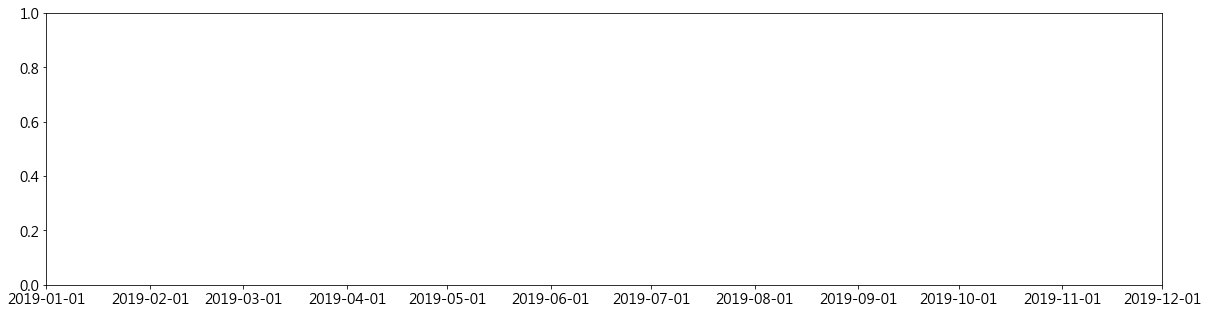

In [8]:
# xtic_range
plt.xticks(xtic_range, df["일자"].loc[xtic_range])
df["일자"].loc[xtic_range]



([<matplotlib.axis.XTick at 0xac6e700>,
 [Text(0, 0, '2019-01-01'),
  Text(31, 0, '2019-02-01'),
  Text(59, 0, '2019-03-01'),
  Text(90, 0, '2019-04-01'),
  Text(120, 0, '2019-05-01'),
  Text(151, 0, '2019-06-01'),
  Text(181, 0, '2019-07-01'),
  Text(212, 0, '2019-08-01'),
  Text(243, 0, '2019-09-01'),
  Text(273, 0, '2019-10-01'),
  Text(304, 0, '2019-11-01'),
  Text(334, 0, '2019-12-01')])

0      2019-01-01
31     2019-02-01
59     2019-03-01
90     2019-04-01
120    2019-05-01
151    2019-06-01
181    2019-07-01
212    2019-08-01
243    2019-09-01
273    2019-10-01
304    2019-11-01
334    2019-12-01
Name: 일자, dtype: object

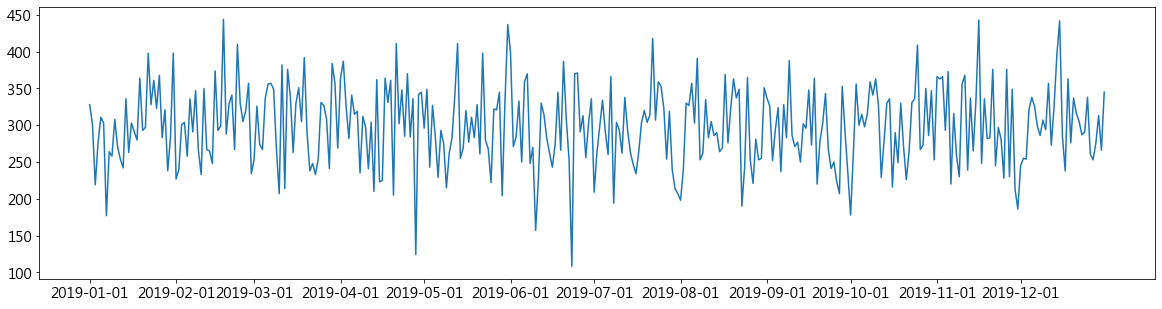

In [9]:
# 그래프 정리

plt.plot(df["일자"],df["구매자수"])
xtic_range=np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) 
plt.xticks(xtic_range, df["일자"].loc[xtic_range])
df["일자"].loc[xtic_range]

In [10]:
# 특별하게 튀는 날짜가 2지점 정도 있음???

([<matplotlib.axis.XTick at 0xc34ca60>,
 [Text(0, 0, '2019-01-01'),
  Text(31, 0, '2019-02-01'),
  Text(59, 0, '2019-03-01'),
  Text(90, 0, '2019-04-01'),
  Text(120, 0, '2019-05-01'),
  Text(151, 0, '2019-06-01'),
  Text(181, 0, '2019-07-01'),
  Text(212, 0, '2019-08-01'),
  Text(243, 0, '2019-09-01'),
  Text(273, 0, '2019-10-01'),
  Text(304, 0, '2019-11-01'),
  Text(334, 0, '2019-12-01')])

0      2019-01-01
31     2019-02-01
59     2019-03-01
90     2019-04-01
120    2019-05-01
151    2019-06-01
181    2019-07-01
212    2019-08-01
243    2019-09-01
273    2019-10-01
304    2019-11-01
334    2019-12-01
Name: 일자, dtype: object

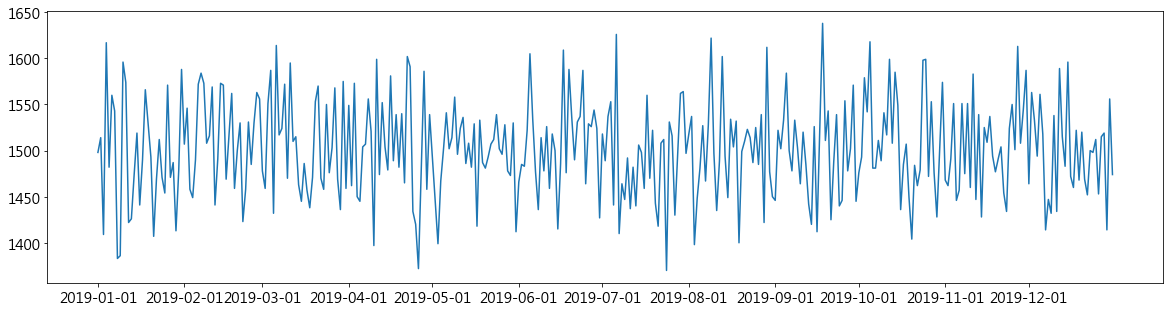

In [11]:
plt.plot(df["일자"],df["방문자수"])
xtic_range=np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) 
plt.xticks(xtic_range, df["일자"].loc[xtic_range])
df["일자"].loc[xtic_range]

In [12]:
# 방문자수는 특별하게 튀는 구간이 안보인다???

([<matplotlib.axis.XTick at 0xc5cc6d0>,
 [Text(0, 0, '2019-01-01'),
  Text(31, 0, '2019-02-01'),
  Text(59, 0, '2019-03-01'),
  Text(90, 0, '2019-04-01'),
  Text(120, 0, '2019-05-01'),
  Text(151, 0, '2019-06-01'),
  Text(181, 0, '2019-07-01'),
  Text(212, 0, '2019-08-01'),
  Text(243, 0, '2019-09-01'),
  Text(273, 0, '2019-10-01'),
  Text(304, 0, '2019-11-01'),
  Text(334, 0, '2019-12-01')])

0      2019-01-01
31     2019-02-01
59     2019-03-01
90     2019-04-01
120    2019-05-01
151    2019-06-01
181    2019-07-01
212    2019-08-01
243    2019-09-01
273    2019-10-01
304    2019-11-01
334    2019-12-01
Name: 일자, dtype: object

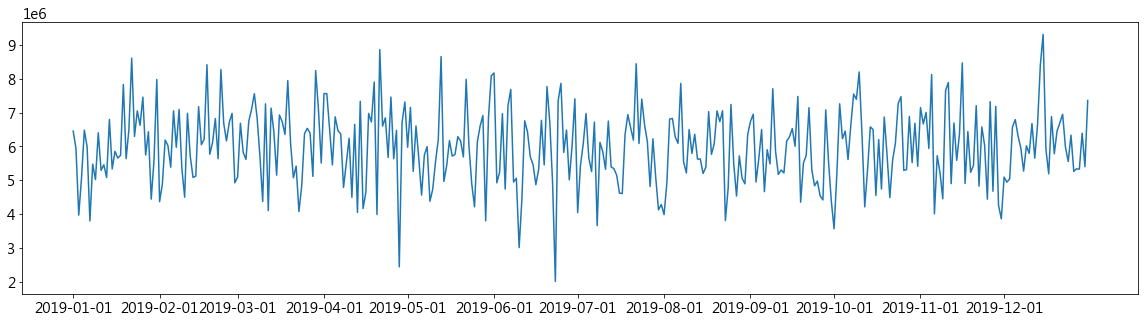

In [13]:
plt.plot(df["일자"],df["총 판매 금액"])
xtic_range=np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) 
plt.xticks(xtic_range, df["일자"].loc[xtic_range])
df["일자"].loc[xtic_range]


# 구매 금액이 튀는 두 지점이 구매자수와 일치하므로 해당 일자의 원인을 확인해야 함



In [14]:
# 구매자 수에 비해서 튀는 정도가 줄어들긴 함,하지만 두군데정도는 튀는정도가 보이니 검토의 필요성이 존재

####  상품 배치와 상품 구매 금액에 따른 관계 분석

- 서로 다른 고객군에게 노출했음

In [15]:
placement_A = pd.read_csv("C:/Users/Administrator/Desktop/coding/python/muticam/jupyter note/data/AB테스트/상품배치_A.csv", index_col = "고객ID",encoding='euc-kr')
placement_A.head()
placement_A.tail()

,구매금액
고객ID,
C-1,20459
C-2,0
C-3,19726
C-4,0
C-5,19049


,구매금액
고객ID,
C-194,0
C-195,19419
C-196,0
C-197,0
C-198,18669


In [16]:
placement_B = pd.read_csv("C:/Users/Administrator/Desktop/coding/python/muticam/jupyter note/data/AB테스트/상품배치_B.csv", engine = "python", index_col = "고객ID",encoding='euc-kr')
placement_B.head()
placement_B.tail()

,구매금액
고객ID,
C-200,0
C-201,0
C-202,0
C-203,19055
C-204,0


,구매금액
고객ID,
C-355,0
C-356,15673
C-357,0
C-358,16396
C-359,17814


In [17]:
placement_C = pd.read_csv("C:/Users/Administrator/Desktop/coding/python/muticam/jupyter note/data/AB테스트/상품배치_C.csv", engine = "python", index_col = "고객ID",encoding='euc-kr')
placement_C.head()
placement_C.tail()

,구매금액
고객ID,
C-360,0
C-361,19844
C-362,19085
C-363,0
C-364,19671


,구매금액
고객ID,
C-503,0
C-504,0
C-505,0
C-506,21363
C-507,0


구매금액이 0인 사람을 제외한 분석 수행

In [18]:
# 구매금액이 0이 아닌 고객에 대해 구매 금액만 추출하시오
placement_A_without_zero = placement_A.loc[placement_A["구매금액"]!=0]
# placement_B_without_zero = 
# placement_C_without_zero = 

In [19]:
placement_A_without_zero

,구매금액
고객ID,
C-1,20459
C-3,19726
C-5,19049
C-9,20084
C-10,21285
...,...
C-191,21148
C-192,20601
C-193,20463


In [20]:
placement_A_without_zero = placement_A.loc[placement_A["구매금액"]!=0].values
placement_A_without_zero

array([[20459],
       [19726],
       [19049],
       [20084],
       [21285],
       [20613],
       [20724],
       [19741],
       [20904],
       [21149],
       [18413],
       [20677],
       [21404],
       [18858],
       [19411],
       [22192],
       [19355],
       [19495],
       [17755],
       [18153],
       [19474],
       [20449],
       [18486],
       [19506],
       [16556],
       [19517],
       [18829],
       [20436],
       [20334],
       [18465],
       [19985],
       [21761],
       [20064],
       [20032],
       [19972],
       [20734],
       [19584],
       [19531],
       [19746],
       [19918],
       [19637],
       [20618],
       [19910],
       [19558],
       [21191],
       [19376],
       [18158],
       [19121],
       [20905],
       [20437],
       [20921],
       [20519],
       [19659],
       [18555],
       [21177],
       [20683],
       [20395],
       [19736],
       [21679],
       [21279],
       [21104],
       [22313],
       [

In [21]:
placement_A_without_zero = placement_A.loc[placement_A["구매금액"]!=0]["구매금액"].values
placement_A_without_zero 


array([20459, 19726, 19049, 20084, 21285, 20613, 20724, 19741, 20904,
       21149, 18413, 20677, 21404, 18858, 19411, 22192, 19355, 19495,
       17755, 18153, 19474, 20449, 18486, 19506, 16556, 19517, 18829,
       20436, 20334, 18465, 19985, 21761, 20064, 20032, 19972, 20734,
       19584, 19531, 19746, 19918, 19637, 20618, 19910, 19558, 21191,
       19376, 18158, 19121, 20905, 20437, 20921, 20519, 19659, 18555,
       21177, 20683, 20395, 19736, 21679, 21279, 21104, 22313, 19397,
       20507, 20300, 20551, 18567, 18703, 20523, 18809, 20092, 18230,
       20282, 20997, 20297, 19943, 21108, 18362, 21545, 19441, 22338,
       20800, 20113, 20097, 20454, 19894, 18728, 19011, 20189, 20239,
       18195, 21059, 20041, 21511, 20062, 18556, 19754, 21148, 20601,
       20463, 19419, 18669], dtype=int64)

In [22]:
# 구매금액이 0이 아닌 고객에 대해 구매 금액만 추출하시오
placement_A_without_zero = placement_A.loc[placement_A["구매금액"]!=0]["구매금액"].values
placement_B_without_zero = placement_B.loc[placement_B["구매금액"]!=0]["구매금액"].values
placement_C_without_zero = placement_C.loc[placement_C["구매금액"]!=0]["구매금액"].values

In [23]:
placement_A_without_zero

array([20459, 19726, 19049, 20084, 21285, 20613, 20724, 19741, 20904,
       21149, 18413, 20677, 21404, 18858, 19411, 22192, 19355, 19495,
       17755, 18153, 19474, 20449, 18486, 19506, 16556, 19517, 18829,
       20436, 20334, 18465, 19985, 21761, 20064, 20032, 19972, 20734,
       19584, 19531, 19746, 19918, 19637, 20618, 19910, 19558, 21191,
       19376, 18158, 19121, 20905, 20437, 20921, 20519, 19659, 18555,
       21177, 20683, 20395, 19736, 21679, 21279, 21104, 22313, 19397,
       20507, 20300, 20551, 18567, 18703, 20523, 18809, 20092, 18230,
       20282, 20997, 20297, 19943, 21108, 18362, 21545, 19441, 22338,
       20800, 20113, 20097, 20454, 19894, 18728, 19011, 20189, 20239,
       18195, 21059, 20041, 21511, 20062, 18556, 19754, 21148, 20601,
       20463, 19419, 18669], dtype=int64)

In [24]:
placement_B_without_zero

array([19055, 17958, 16292, 18296, 17472, 17003, 16919, 18036, 18333,
       18790, 18476, 17656, 19401, 18165, 17938, 16646, 19687, 16829,
       18523, 18219, 17841, 18901, 17940, 17361, 18626, 18869, 16528,
       16169, 18261, 18988, 17040, 17941, 19306, 18638, 17245, 19988,
       18873, 19359, 19125, 17486, 19579, 19049, 18590, 18074, 18091,
       18567, 20944, 18029, 17043, 18648, 16544, 18794, 18741, 17667,
       17729, 17515, 19275, 18199, 18953, 17915, 16265, 19629, 16951,
       19429, 16830, 15673, 16396, 17814], dtype=int64)

In [25]:
placement_C_without_zero

array([19844, 19085, 19671, 20429, 20855, 20554, 20541, 19774, 21641,
       22352, 20783, 21120, 17282, 19011, 20839, 18950, 19249, 19701,
       19686, 20294, 18794, 19354, 20332, 20152, 19702, 20273, 20129,
       21526, 19507, 21706, 19083, 20380, 20212, 19578, 20621, 20518,
       20727, 20664, 20611, 18169, 21284, 20814, 20773, 21456, 20694,
       17275, 20105, 20027, 17400, 20658, 19174, 20398, 18149, 18885,
       19733, 19350, 20463, 21519, 21363], dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0xc08df10>,
 'caps': [<matplotlib.lines.Line2D at 0xc095f70>,
 'boxes': [<matplotlib.lines.Line2D at 0xc08d1f0>,
 'medians': [<matplotlib.lines.Line2D at 0xc146670>,
 'fliers': [<matplotlib.lines.Line2D at 0xc07c2b0>,
 'means': []}

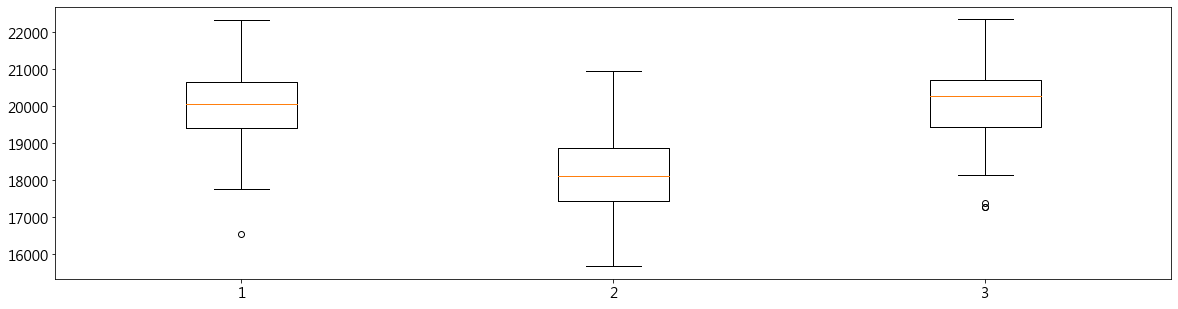

In [26]:
# 위 세 데이터를 box plot 으로 시각화 하시오

plt.boxplot([placement_A_without_zero,placement_B_without_zero,placement_C_without_zero])


In [27]:
## 세 데이터의 평균이 차이가 있는지 확인하시오-2개 초과하는 변수의 차이검정(일원분산분석-아노바검정)

아노바검정 조건
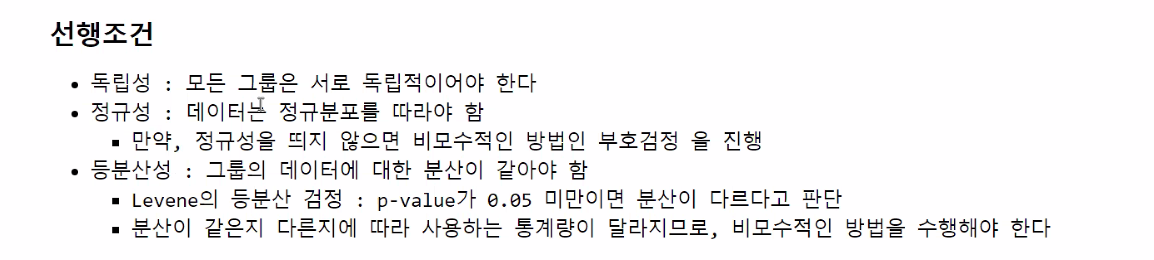


In [28]:
print(type(placement_A_without_zero))

<class 'numpy.ndarray'>


In [29]:
# from scipy.stats import *
kstest(placement_A_without_zero, 'norm')
kstest(placement_B_without_zero, 'norm')
kstest(placement_C_without_zero, 'norm')


#pvalue 가 0에 수렴하므로 정규분포를 따른다.

KstestResult(statistic=1.0, pvalue=0.0)

KstestResult(statistic=1.0, pvalue=0.0)

KstestResult(statistic=1.0, pvalue=0.0)

In [30]:
# 등분산 검정
levene(placement_A_without_zero,placement_B_without_zero,placement_C_without_zero)
#pvalue 가 0.98로 거의 1에가까움-귀무가설 채택-등분산성이 있다

LeveneResult(statistic=0.012659999227426385, pvalue=0.9874205016592401)

- 등분산성과 정규성이 검정되지 않으면 아래 함수를 통한 검정은 불가능함
    - 비모수적인 방법을 사용해야 함
    

In [31]:
# 일원분산분석 수행
# 귀무가설 : 세 그룹의 평균 차이는 없다(평균은 같다)
# 대립가설: 세 그룹에서 최소 하나의 그룹은 다른 그룹과 평균차이가 있다.(평균이 다르다)
f_oneway(placement_A_without_zero,placement_B_without_zero,placement_C_without_zero)

# pvalue가 거의 0이므로 최소하나의 그룹은 다른 그룹과 평균차이가 있다-귀무가설 기각

F_onewayResult(statistic=76.88192392994758, pvalue=3.382319770772329e-26)

In [32]:
A=placement_A_without_zero
B=placement_B_without_zero
C=placement_C_without_zero

In [33]:
# 사후 분석

A
B
C


array([20459, 19726, 19049, 20084, 21285, 20613, 20724, 19741, 20904,
       21149, 18413, 20677, 21404, 18858, 19411, 22192, 19355, 19495,
       17755, 18153, 19474, 20449, 18486, 19506, 16556, 19517, 18829,
       20436, 20334, 18465, 19985, 21761, 20064, 20032, 19972, 20734,
       19584, 19531, 19746, 19918, 19637, 20618, 19910, 19558, 21191,
       19376, 18158, 19121, 20905, 20437, 20921, 20519, 19659, 18555,
       21177, 20683, 20395, 19736, 21679, 21279, 21104, 22313, 19397,
       20507, 20300, 20551, 18567, 18703, 20523, 18809, 20092, 18230,
       20282, 20997, 20297, 19943, 21108, 18362, 21545, 19441, 22338,
       20800, 20113, 20097, 20454, 19894, 18728, 19011, 20189, 20239,
       18195, 21059, 20041, 21511, 20062, 18556, 19754, 21148, 20601,
       20463, 19419, 18669], dtype=int64)

array([19055, 17958, 16292, 18296, 17472, 17003, 16919, 18036, 18333,
       18790, 18476, 17656, 19401, 18165, 17938, 16646, 19687, 16829,
       18523, 18219, 17841, 18901, 17940, 17361, 18626, 18869, 16528,
       16169, 18261, 18988, 17040, 17941, 19306, 18638, 17245, 19988,
       18873, 19359, 19125, 17486, 19579, 19049, 18590, 18074, 18091,
       18567, 20944, 18029, 17043, 18648, 16544, 18794, 18741, 17667,
       17729, 17515, 19275, 18199, 18953, 17915, 16265, 19629, 16951,
       19429, 16830, 15673, 16396, 17814], dtype=int64)

array([19844, 19085, 19671, 20429, 20855, 20554, 20541, 19774, 21641,
       22352, 20783, 21120, 17282, 19011, 20839, 18950, 19249, 19701,
       19686, 20294, 18794, 19354, 20332, 20152, 19702, 20273, 20129,
       21526, 19507, 21706, 19083, 20380, 20212, 19578, 20621, 20518,
       20727, 20664, 20611, 18169, 21284, 20814, 20773, 21456, 20694,
       17275, 20105, 20027, 17400, 20658, 19174, 20398, 18149, 18885,
       19733, 19350, 20463, 21519, 21363], dtype=int64)

In [34]:
# 사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Data= A.tolist()+ B.tolist()+  C.tolist()

Data

Group = ["A"]*len(A)+ ["B"]*len(B)+ ["C"]*len(C)


Group


len(Data),len(Group)


posthoc= pairwise_tukeyhsd(Data,Group)


posthoc

print(posthoc) 

[20459,
 19726,
 19049,
 20084,
 21285,
 20613,
 20724,
 19741,
 20904,
 21149,
 18413,
 20677,
 21404,
 18858,
 19411,
 22192,
 19355,
 19495,
 17755,
 18153,
 19474,
 20449,
 18486,
 19506,
 16556,
 19517,
 18829,
 20436,
 20334,
 18465,
 19985,
 21761,
 20064,
 20032,
 19972,
 20734,
 19584,
 19531,
 19746,
 19918,
 19637,
 20618,
 19910,
 19558,
 21191,
 19376,
 18158,
 19121,
 20905,
 20437,
 20921,
 20519,
 19659,
 18555,
 21177,
 20683,
 20395,
 19736,
 21679,
 21279,
 21104,
 22313,
 19397,
 20507,
 20300,
 20551,
 18567,
 18703,
 20523,
 18809,
 20092,
 18230,
 20282,
 20997,
 20297,
 19943,
 21108,
 18362,
 21545,
 19441,
 22338,
 20800,
 20113,
 20097,
 20454,
 19894,
 18728,
 19011,
 20189,
 20239,
 18195,
 21059,
 20041,
 21511,
 20062,
 18556,
 19754,
 21148,
 20601,
 20463,
 19419,
 18669,
 19055,
 17958,
 16292,
 18296,
 17472,
 17003,
 16919,
 18036,
 18333,
 18790,
 18476,
 17656,
 19401,
 18165,
 17938,
 16646,
 19687,
 16829,
 18523,
 18219,
 17841,
 18901,
 17940,


['A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B'

(229, 229)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     A      B -1883.1765 0.001 -2276.2766 -1490.0763   True
     A      C    66.7946   0.9  -343.9011   477.4903  False
     B      C  1949.9711 0.001  1503.2312  2396.7109   True
-----------------------------------------------------------


In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Data= placement_A_without_zero.tolist()+ placement_B_without_zero.tolist()+  placement_C_without_zero.tolist()
Group = ["A"]*len(placement_A_without_zero)+ ["B"]*len(placement_B_without_zero)+ ["C"]*len(placement_C_without_zero)
posthoc= pairwise_tukeyhsd(Data,Group)
print(posthoc) 

#(A와 C는 평균차이가 없는 관계)~B은 평균차이가 존재

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     A      B -1883.1765 0.001 -2276.2766 -1490.0763   True
     A      C    66.7946   0.9  -343.9011   477.4903  False
     B      C  1949.9711 0.001  1503.2312  2396.7109   True
-----------------------------------------------------------


In [36]:
print(posthoc) 

# reject 결과를 확인: 두번째줄의  reject 가 False
# 두번째 줄은 [A,C][B]로 데이터가 구분됨
# 즉 집단 B는 다른 집단과 유의미한 차이가 존재

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     A      B -1883.1765 0.001 -2276.2766 -1490.0763   True
     A      C    66.7946   0.9  -343.9011   477.4903  False
     B      C  1949.9711 0.001  1503.2312  2396.7109   True
-----------------------------------------------------------


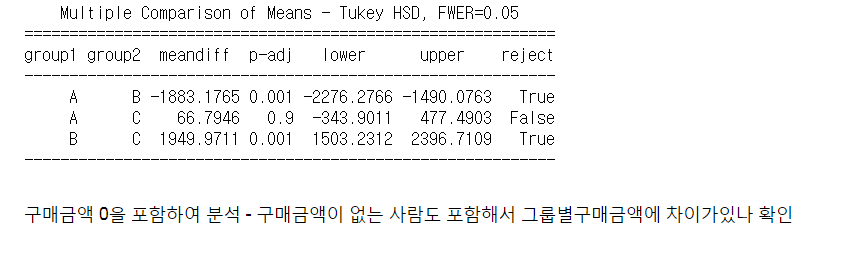

####  구매 여부와 상품 배치 간 관계 파악 


In [37]:
# 데이터 변환
placement_A['상품배치'] = 'A'
placement_B['상품배치'] = 'B'
placement_C['상품배치'] = 'C'

placement = pd.concat([placement_A, placement_B, placement_C], axis = 0, ignore_index = False)
placement['구매여부'] = (placement['구매금액'] != 0).astype(int) #T면 1로 F면 0으로 - 구매금액이 있으면 1 없으면 0
placement.head()


,구매금액,상품배치,구매여부
고객ID,,,
C-1,20459,A,1
C-2,0,A,0
C-3,19726,A,1
C-4,0,A,0
C-5,19049,A,1


In [38]:
placement

,구매금액,상품배치,구매여부
고객ID,,,
C-1,20459,A,1
C-2,0,A,0
C-3,19726,A,1
C-4,0,A,0
C-5,19049,A,1
...,...,...,...
C-503,0,C,0
C-504,0,C,0
C-505,0,C,0


In [39]:
# 교차 테이블 생성
# crosstable (data1,data2)
cross_table = pd.crosstab(placement["상품배치"], placement["구매여부"])
cross_table

구매여부,0,1
상품배치,,
A,96,102
B,92,68
C,89,59


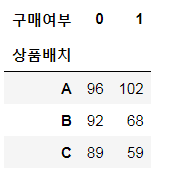

In [40]:
obs = cross_table.values
statistics, pvalue, dof, expected = chi2_contingency(obs,correction = True)
print(pvalue) # pvalue가 0.06으로 구매여부와 상품배치에는 관계가 있다고 보기 힘듦- B랑 C가 차이가 크지 않아서 이렇게 나왔을 가능성이 큼

0.0686402428247769


In [41]:
# 기대값
pd.DataFrame(expected, columns = cross_table.columns, index = cross_table.index)

구매여부,0,1
상품배치,,
A,108.391304,89.608696
B,87.588933,72.411067
C,81.019763,66.980237


####  사이트맵 구성에 따른 체류 시간 차이 분석

In [42]:
sitemap_A = pd.read_csv("C:/Users/Administrator/Desktop/coding/python/muticam/jupyter note/data/AB테스트/사이트맵_A.csv", engine = "python",encoding="euc-kr")
sitemap_A.head()

,고객ID,체류시간(분)
0,C-508,9
1,C-509,8
2,C-510,7
3,C-511,9
4,C-512,10


In [43]:
sitemap_B = pd.read_csv("C:/Users/Administrator/Desktop/coding/python/muticam/jupyter note/data/AB테스트/사이트맵_B.csv", engine = "python",encoding="euc-kr")
sitemap_B.head()

,고객ID,체류시간(분)
0,C-696,10
1,C-697,11
2,C-698,12
3,C-699,10
4,C-700,8


In [44]:
sitemap_C = pd.read_csv("C:/Users/Administrator/Desktop/coding/python/muticam/jupyter note/data/AB테스트/사이트맵_C.csv", engine = "python",encoding="euc-kr")
sitemap_C.head()

,고객ID,체류시간(분)
0,C-820,8
1,C-821,11
2,C-822,10
3,C-823,11
4,C-824,9


In [45]:
sitemap_A_time = sitemap_A['체류시간(분)'].values
sitemap_B_time = sitemap_B['체류시간(분)'].values
sitemap_C_time = sitemap_C['체류시간(분)'].values

In [46]:
print(type(sitemap_A_time ))
print(type(sitemap_B_time ))
print(type(sitemap_C_time ))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [47]:
A_mean = sitemap_A_time.mean()
B_mean = sitemap_B_time.mean()
C_mean = sitemap_C_time.mean()

print("사이트 맵 A의 체류시간 평균: {}\n사이트 맵 B의 체류시간 평균: {}\n사이트 맵 C의 체류시간 평균: {}".format(round(A_mean, 3), round(B_mean, 3), round(C_mean, 3)))

사이트 맵 A의 체류시간 평균: 9.404
사이트 맵 B의 체류시간 평균: 9.831
사이트 맵 C의 체류시간 평균: 9.514


{'whiskers': [<matplotlib.lines.Line2D at 0xac586a0>,
 'caps': [<matplotlib.lines.Line2D at 0xac58a30>,
 'boxes': [<matplotlib.lines.Line2D at 0xac58f70>,
 'medians': [<matplotlib.lines.Line2D at 0xac5fb50>,
 'fliers': [<matplotlib.lines.Line2D at 0xac5f460>,
 'means': []}

([<matplotlib.axis.XTick at 0xc0ea130>,
 [Text(1, 0, '사이트 맵 A'), Text(2, 0, '사이트 맵 B'), Text(3, 0, '사이트 맵 C')])

Text(0, 0.5, '체류시간')

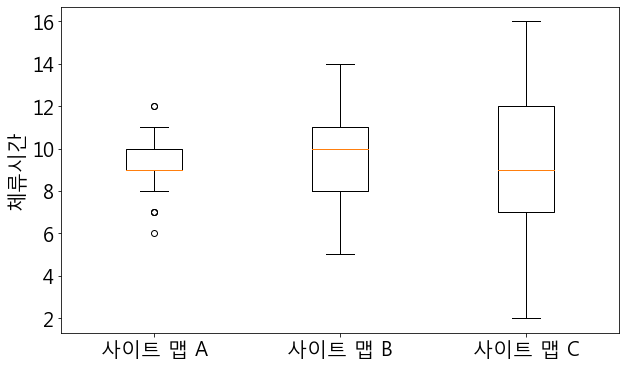

In [48]:
# box 플롯으로 시각화

%matplotlib inline
from matplotlib import pyplot as plt


from matplotlib import pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 6)


plt.boxplot([sitemap_A_time,sitemap_B_time,sitemap_C_time])


plt.xticks([1,2,3],['사이트 맵 A',"사이트 맵 B","사이트 맵 C"])

plt.ylabel("체류시간")


In [49]:
# 각 데이터가 정규분포를 따름을 확인
kstest(sitemap_A_time , 'norm')
kstest(sitemap_B_time , 'norm')
kstest(sitemap_C_time , 'norm')

# 모든  pvalue가 거의 0으로 수렴하므로 정규분포를 따른다.

KstestResult(statistic=0.9999999990134123, pvalue=0.0)

KstestResult(statistic=0.9999997133484281, pvalue=0.0)

KstestResult(statistic=0.9891262924445604, pvalue=1.320331854479069e-206)

In [50]:
# 등분산성 검정
levene(sitemap_A_time,sitemap_B_time,sitemap_C_time)

#  pvalue 가 0.05 보다 작으므로 귀무가설 기각-등분산성이 없다

LeveneResult(statistic=60.293391878247746, pvalue=1.0454410123159872e-23)

In [51]:
# 등분산성 검정되지 않았으므로 비모수적인 방법으로 확인해야함
# 일원분산분석 수행: p-value가 거의 0에 수렴 => A, B, C의 평균은 유의한 차이가 존재하지 않음을 확인
f_oneway(sitemap_A_time,sitemap_B_time,sitemap_C_time)

F_onewayResult(statistic=1.6538817694924581, pvalue=0.19256727851054653)

- 할인 쿠폰의 효과 분석 - 쌍체표본 T 검정

In [52]:
df = pd.read_csv("C:/Users/Administrator/Desktop/coding/python/muticam/jupyter note/data/AB테스트/할인쿠폰발행효과.csv", engine = "python",encoding="euc-kr")
df.head()

,고객ID,발행전 구매 횟수,발행후 구매 횟수
0,C-925,3,1
1,C-926,0,0
2,C-927,0,3
3,C-928,0,4
4,C-929,4,4


{'whiskers': [<matplotlib.lines.Line2D at 0xc89c7c0>,
 'caps': [<matplotlib.lines.Line2D at 0xc89ce80>,
 'boxes': [<matplotlib.lines.Line2D at 0xc89c430>,
 'medians': [<matplotlib.lines.Line2D at 0xc8a8580>,
 'fliers': [<matplotlib.lines.Line2D at 0xc8a88e0>,
 'means': []}

([<matplotlib.axis.XTick at 0xc878e20>, <matplotlib.axis.XTick at 0xc878df0>],
 [Text(1, 0, '발행전'), Text(2, 0, '발행후')])

Text(0, 0.5, '구매 횟수')

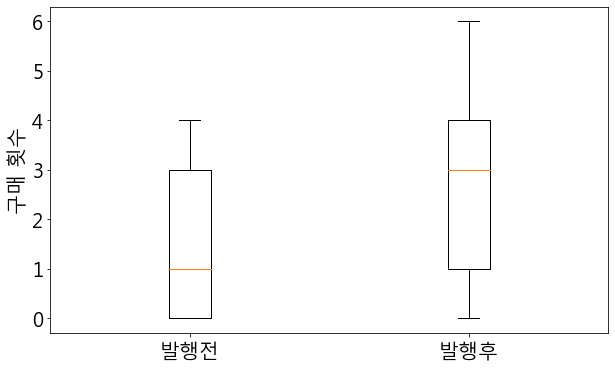

In [53]:
plt.boxplot([df['발행전 구매 횟수'], df['발행후 구매 횟수']])
plt.xticks([1, 2], ['발행전', '발행후'])
plt.ylabel("구매 횟수")

In [54]:
## 정규성 검정(발행전,발행후의 데이터 차이는  정규성을 띄어야 함)

kstest(df["발행후 구매 횟수"]-df["발행전 구매 횟수"], "norm")

#  pvalue가 유의수준 이하이므로 정규성을 띈다

KstestResult(statistic=0.4253018161037688, pvalue=8.597340234980609e-26)

In [55]:
# 귀무가설: 발행전과 발행후의 평균은 같다(할인 쿠폰은 영향이 없다)
# 대립가설: 발행전과 후의 평균은 다르다(할인 쿠폰은 영향이 있다.)
ttest_rel(df["발행후 구매 횟수"],df["발행전 구매 횟수"])
#  pvalue 가 유의수준보다 작으므로 귀무가설 기각:할인 쿠폰은 영향이 없다고 볼수 없다.
# 통계량이 양수이므로 발행후 구매 횟수의 평균이 더높다=-양의 영향이 더 크다.

Ttest_relResult(statistic=7.07211673728211, pvalue=5.104217839308897e-11)

####  체류 시간과 구매 금액 간 관계 분석 - 상관분석

In [56]:
df = pd.read_csv("C:/Users/Administrator/Desktop/coding/python/muticam/jupyter note/data/AB테스트/체류시간_구매금액.csv", engine = "python",encoding="euc-kr")
df.head()

,고객ID,구매금액,체류시간
0,C-1079,78625,9
1,C-1080,0,9
2,C-1081,105173,12
3,C-1082,0,14
4,C-1083,0,10


<AxesSubplot:xlabel='체류시간', ylabel='구매금액'>

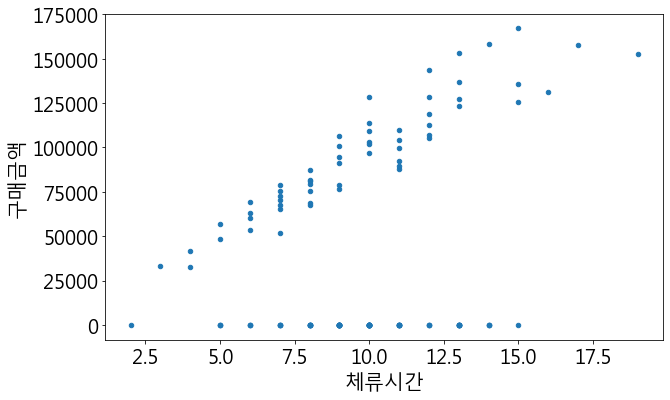

In [57]:
df.plot(kind = 'scatter', x = '체류시간', y = '구매금액')

- 상관 계수:
    - 0.0~0.1: 거의 관계없음
    - 0.1~0.2: 약한 양의 상관관계
    - 0.2~0.4: 일반적인 양의 상관관계
    - 0.4~0.6: 비교적 강한 양의 상관관계
    - 0.6~0.8: 강한 양의 상관 관계
    - 0.8~1.0: 매우 강한 양의 상관관계 # 동일 데이터가 아닌지 확인해야 함

In [59]:
df

,고객ID,구매금액,체류시간
0,C-1079,78625,9
1,C-1080,0,9
2,C-1081,105173,12
3,C-1082,0,14
4,C-1083,0,10
...,...,...,...
117,C-1196,0,5
118,C-1197,75573,7
119,C-1198,99731,11
120,C-1199,106312,9


In [60]:

df.corr(method="pearson")
df.corr(method="spearman") # 데이터가 아닌 해당 변수내의 상대적인 순위를 이용한 상관분석
# spearman은 수집데이터가 순위데이터거나 value가 정규성을 너무 많이 벗어날 경우 사용

,구매금액,체류시간
구매금액,1.000000,0.320852
체류시간,0.320852,1.000000


,구매금액,체류시간
구매금액,1.000000,0.229853
체류시간,0.229853,1.000000


In [61]:
df_without_zero = df.loc[df['구매금액']!=0]
df_without_zero.corr(method='pearson')

,구매금액,체류시간
구매금액,1.000000,0.924526
체류시간,0.924526,1.000000


In [62]:
df_without_zero.corr(method='spearman')

,구매금액,체류시간
구매금액,1.000000,0.938099
체류시간,0.938099,1.000000


#### 구매버튼 배치에 따른 구매율 차이 분석

In [63]:
df = pd.read_excel("C:/Users/Administrator/Desktop/coding/python/muticam/jupyter note/data/AB테스트/구매여부_버튼타입_통계.xlsx")
df.head()

,구매여부,버튼타입,고객 수
0,구매,A,9
1,NaN,B,9
2,NaN,C,15
3,비구매,A,93
4,NaN,B,85


In [64]:
# 현재 nan이 표시된 셀의 이전 데이터로 변환
# 위 df의 1번행은 nan이고 0번행은 구매이므로 1번행의 구매여부가 구매로 채워지게 됨
df.fillna(method = 'ffill', inplace = True)
df.head()

,구매여부,버튼타입,고객 수
0,구매,A,9
1,구매,B,9
2,구매,C,15
3,비구매,A,93
4,비구매,B,85


In [65]:
pd.crosstab(df["구매여부"],df["버튼타입"]) #이상하지 피벗테이블을 활용해보자

cross_table=pd.pivot_table(df,index="구매여부", columns="버튼타입", values="고객 수")
cross_table

버튼타입,A,B,C
구매여부,,,
구매,1,1,1
비구매,1,1,1


버튼타입,A,B,C
구매여부,,,
구매,9,9,15
비구매,93,85,89


In [67]:
obs = cross_table.values # 분석

statistics, pvalue, dof, expected = chi2_contingency(obs,correction = True)

In [68]:
obs

array([[ 9,  9, 15],
       [93, 85, 89]], dtype=int64)

In [69]:
statistics

1.9334148435131413

In [70]:
pvalue

0.38033325575735993

In [71]:
dof

2

In [72]:
expected

array([[11.22, 10.34, 11.44],
       [90.78, 83.66, 92.56]])